# ***Exploratory Data Analysis***

---

## ***Telco Customer Churn***

- Siniflandirma projesinde Telco Customer Churn verileriyle calisarak musterilerin kacis durumunu tahmin edecegiz. Veri seti [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn)'dan elde edilmisitir.
- ***Veri Seti:*** Telco Customer Churn
- ***Arastirma konusu:*** Musteri kacis durumu hedef degisken, diger degiskenler aciklayici degisken olmak uzere Musteri kacis durumunu tahmin eden bir model olusturulacaktir.
- Burada Kesifsel Veri Analizi yapilmistir. Nihai sonuc dosyasi ```data/telco_customer_churn_clean.csv``` dosyasina kaydedilmistir, model testleri ve secimi bu dosya uzerinden yapilacaktir.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# uyarilari dikkate alma
import warnings
warnings.filterwarnings('ignore')

# pandas varsayilan olarak cok sayida sutun veya satir varsa tumunu gostermez
# bu nedenle 100 sutun ve satir gostermesi icin
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# virgulden sonra belirli sayida basamak gosterimi icin 
pd.options.display.float_format = '{:,.3f}'.format
# sutunun genisligi
pd.options.display.max_colwidth = 100

# font tanimlamalari
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}
font_axis  = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}
#color codes
mycolors = ['#3498DB', '#CB4335']
palette_binary = sns.color_palette(mycolors)

---
### ***Veri Kesfi***
---
#### ***Degisken Turlerinin Tespiti***

In [2]:
customer_churn = pd.read_csv('./data/telco_customer_churn.csv')

customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
for col in customer_churn.columns:
    if (customer_churn[col].nunique()<20):
        print('{:<20}{:>5} {}'.format(col, customer_churn[col].nunique(), customer_churn[col].unique()))
    else:
        print('{:<20}{:>5}'.format(col,customer_churn[col].nunique()))

customerID           7043
gender                  2 ['Female' 'Male']
SeniorCitizen           2 [0 1]
Partner                 2 ['Yes' 'No']
Dependents              2 ['No' 'Yes']
tenure                 73
PhoneService            2 ['No' 'Yes']
MultipleLines           3 ['No phone service' 'No' 'Yes']
InternetService         3 ['DSL' 'Fiber optic' 'No']
OnlineSecurity          3 ['No' 'Yes' 'No internet service']
OnlineBackup            3 ['Yes' 'No' 'No internet service']
DeviceProtection        3 ['No' 'Yes' 'No internet service']
TechSupport             3 ['No' 'Yes' 'No internet service']
StreamingTV             3 ['No' 'Yes' 'No internet service']
StreamingMovies         3 ['No' 'Yes' 'No internet service']
Contract                3 ['Month-to-month' 'One year' 'Two year']
PaperlessBilling        2 ['Yes' 'No']
PaymentMethod           4 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges       1585
TotalCharges         6531
Chu

In [4]:
# tenure: number of months the customer has stayed with the company
np.sort(customer_churn.tenure.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [5]:
customer_churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check          29.850        29.85   
1               No               Mailed check          56.950       1889.5   
2              Yes               Mailed check          53.850       108.15   
3               No  Bank transfer (automatic)          42.300      1840.75   
4              Yes           Electronic check          70.700       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

#### ***Degisken Turlerinin Degistirilmesi*** (surekli -> kategorik  -- optional)

---
### ***Verideki Problemlerin Tespiti***
---
#### ***Eksik Degerlerin Doldurulmasi***

- TotlaCharges object tipinde ve bosluklu veriler mevcut.

In [6]:
# astype fonksiyonu hata verdiginden custom fonksiyon tanimladik
# bosluk olan degerler var 
def check_cols(col):
    # donusturmede problem yoksa veriyi koru
    try:
        float(col)
        return col
    except:
        # veride tamamen bosluk mu var
        if col.isspace():
            print('bosluklu veri'+col+'var' )
            # bosluk yerine sifir dondur
            return '0.0'
        else:
            print(col)

In [7]:
# bosluk yerine '0.0'
customer_churn.TotalCharges = customer_churn.TotalCharges.apply(check_cols)

bosluklu veri var
bosluklu veri var
bosluklu veri var
bosluklu veri var
bosluklu veri var
bosluklu veri var
bosluklu veri var
bosluklu veri var
bosluklu veri var
bosluklu veri var
bosluklu veri var


In [8]:
# astype baslangicta hata verdi
# yukaridaki fonksiyondan sonra calistirildi
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].astype('float64')

In [9]:
customer_churn.isnull().mean()

customerID         0.000
gender             0.000
SeniorCitizen      0.000
Partner            0.000
Dependents         0.000
tenure             0.000
PhoneService       0.000
MultipleLines      0.000
InternetService    0.000
OnlineSecurity     0.000
OnlineBackup       0.000
DeviceProtection   0.000
TechSupport        0.000
StreamingTV        0.000
StreamingMovies    0.000
Contract           0.000
PaperlessBilling   0.000
PaymentMethod      0.000
MonthlyCharges     0.000
TotalCharges       0.000
Churn              0.000
dtype: float64

---
#### ***Aykiri Degerlerin Tespiti ve/veya Giderilmesi***

In [10]:
continuous = ['tenure', 'TotalCharges', 'MonthlyCharges']

In [11]:
categoric = [col for col in customer_churn.columns if customer_churn[col].nunique()<10]

In [12]:
print(continuous)
print(categoric)

['tenure', 'TotalCharges', 'MonthlyCharges']
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


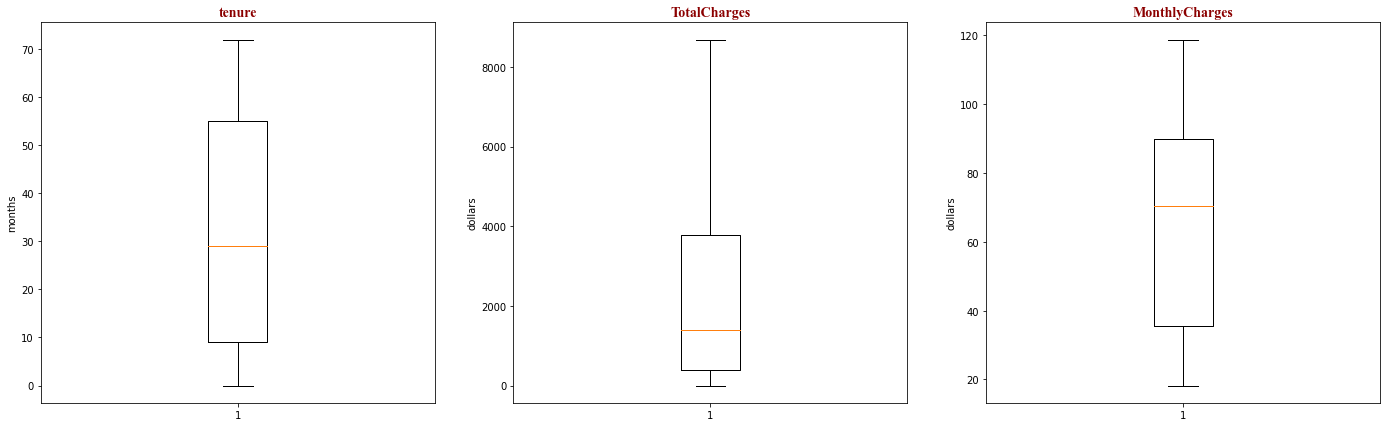

In [13]:
plt.figure(figsize=(24,7))
for i, col in enumerate(continuous):
    plt.subplot(1,3,i+1)
    plt.boxplot(customer_churn[col])
    plt.title(col, fontdict=font_title)
    if col=='tenure':
        plt.ylabel('months')
    else:
        plt.ylabel('dollars')
plt.show()

---
### ***Degiskenlerin Analizi***
---
#### ***Tek Degiskenli Analiz (Univariate Analysis)***
***Istatistiki Veriler (describe)***

In [14]:
customer_churn[continuous].describe()

tenure  TotalCharges  MonthlyCharges
count 7,043.000     7,043.000       7,043.000
mean     32.371     2,279.734          64.762
std      24.559     2,266.794          30.090
min       0.000         0.000          18.250
25%       9.000       398.550          35.500
50%      29.000     1,394.550          70.350
75%      55.000     3,786.600          89.850
max      72.000     8,684.800         118.750

***Surekli Degiskenlerin Gorsel Analizi***

***Dagilim Grafigi (histograms, pairplots, distplots)***

- pairplot

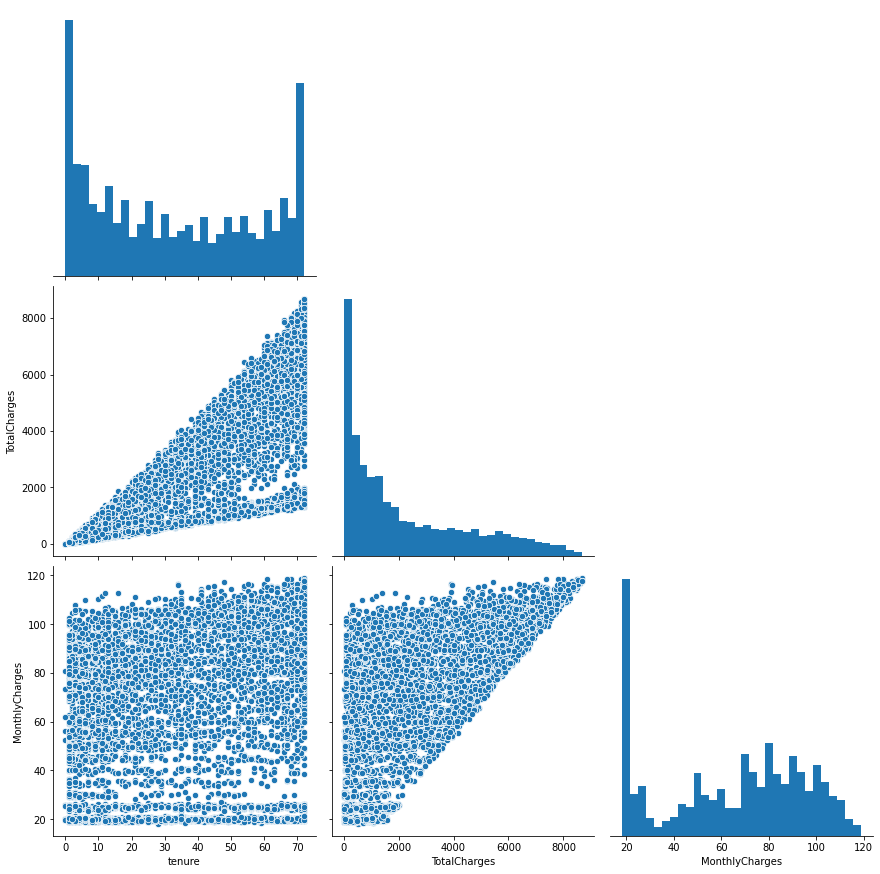

In [15]:
_ = sns.pairplot(customer_churn[continuous], height=4, diag_kws={'bins':30}, 
                 plot_kws={'s':40}, corner=True )

- melt-facetgrid-map-distplot

In [16]:
f= pd.melt(customer_churn, value_vars=continuous)

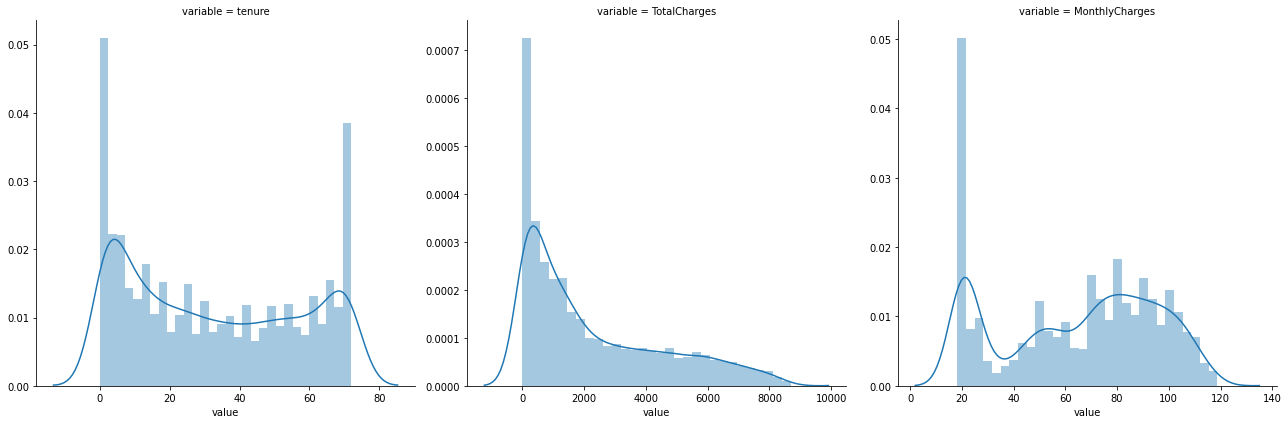

In [17]:
g = sns.FacetGrid(data=f, col='variable', col_wrap=3, sharex=False, sharey=False, height=6)
g = g.map(sns.distplot, 'value', kde=True, bins=30)

***Kategorik Degiskenlerin Gorsel Analizi***

***Sayi Grafigi (countplots)***

- melt-facetgrid-map-countplot

In [18]:
categoric

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

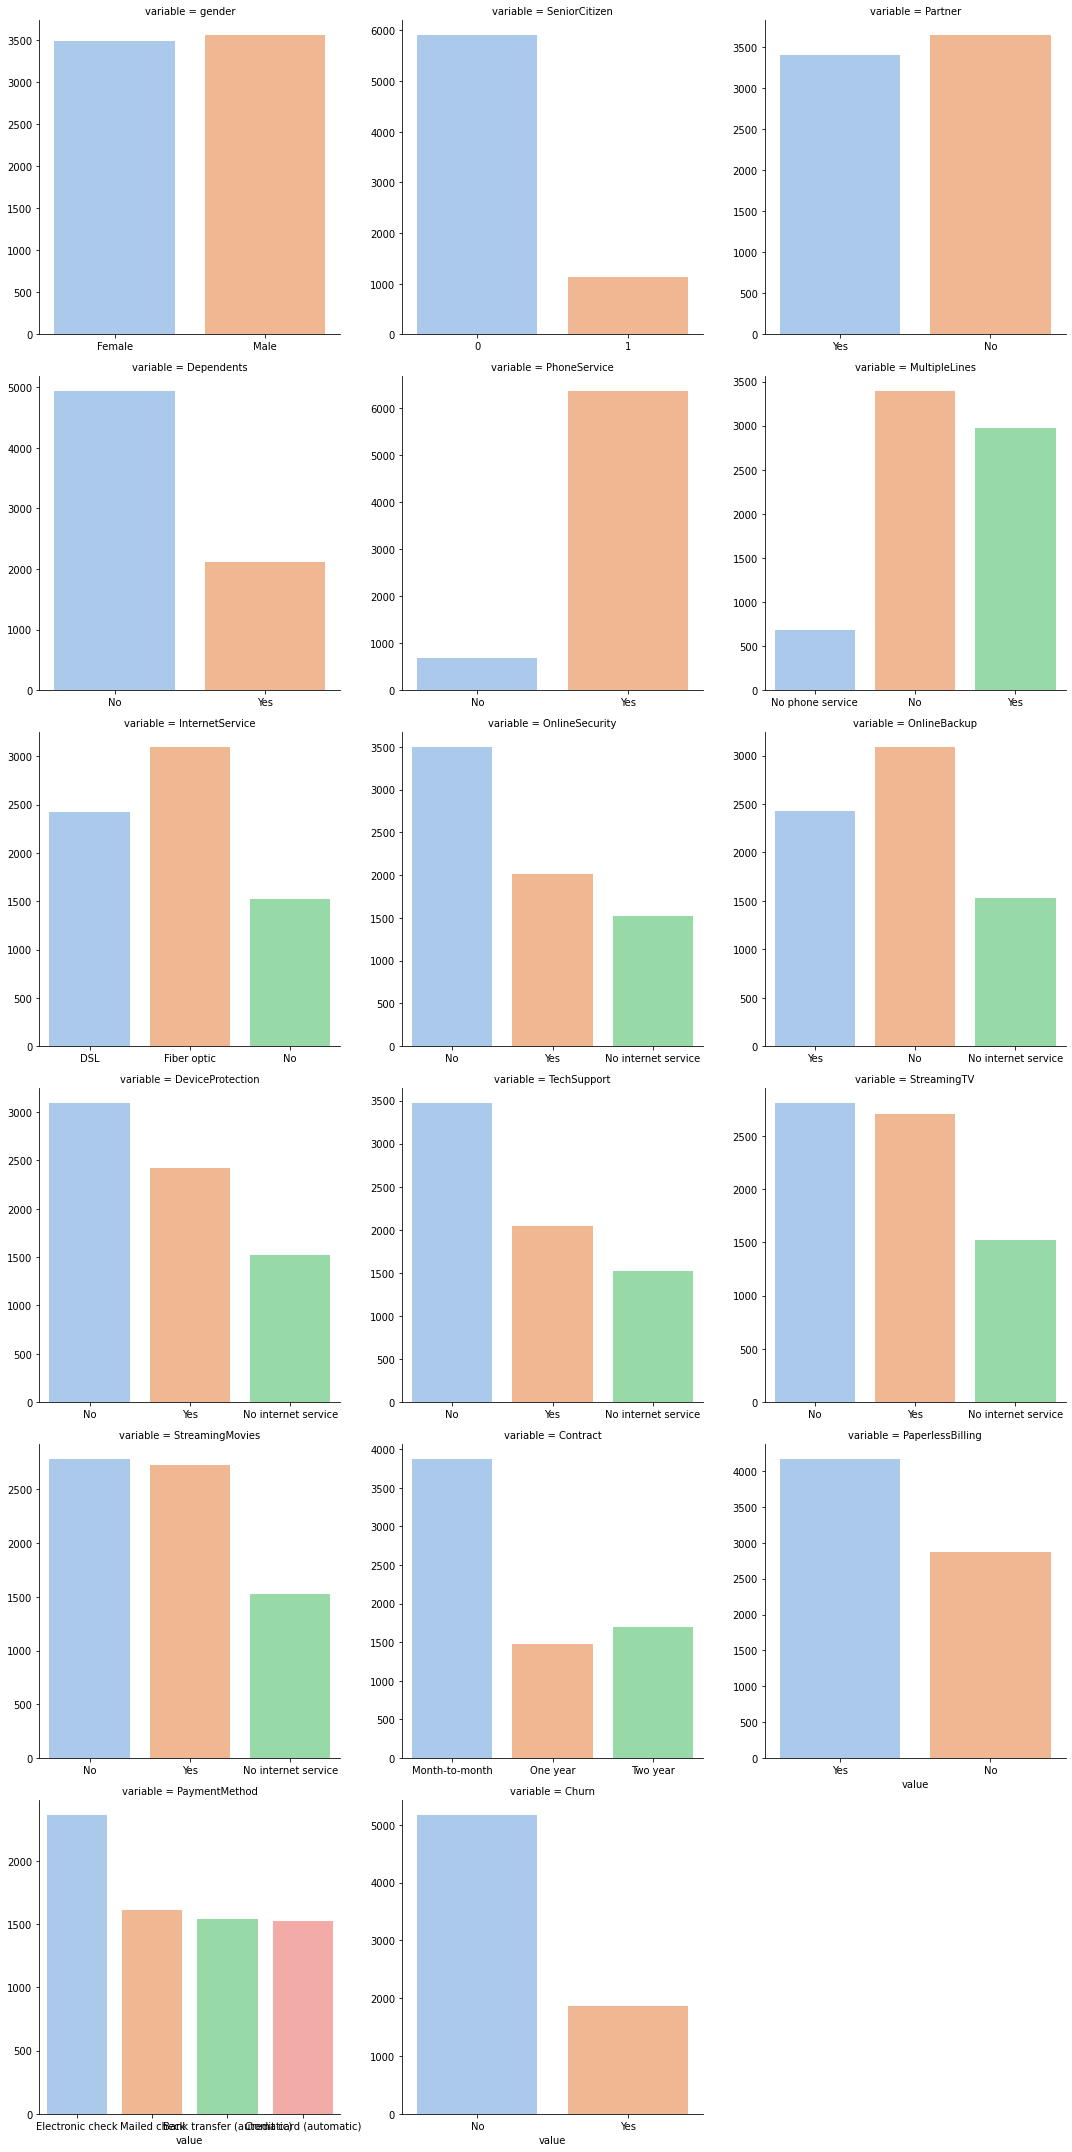

In [19]:
f = pd.melt(customer_churn, value_vars=categoric)
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(sns.countplot,'value', palette=sns.color_palette('pastel')) 

---
#### ***Cok Degiskenli Analiz (Multivariate Analysis)***

***Iki Surekli Degiskenin Iki Degiskenli Analizi***

- Dagilim Grafigi (scatter plots)

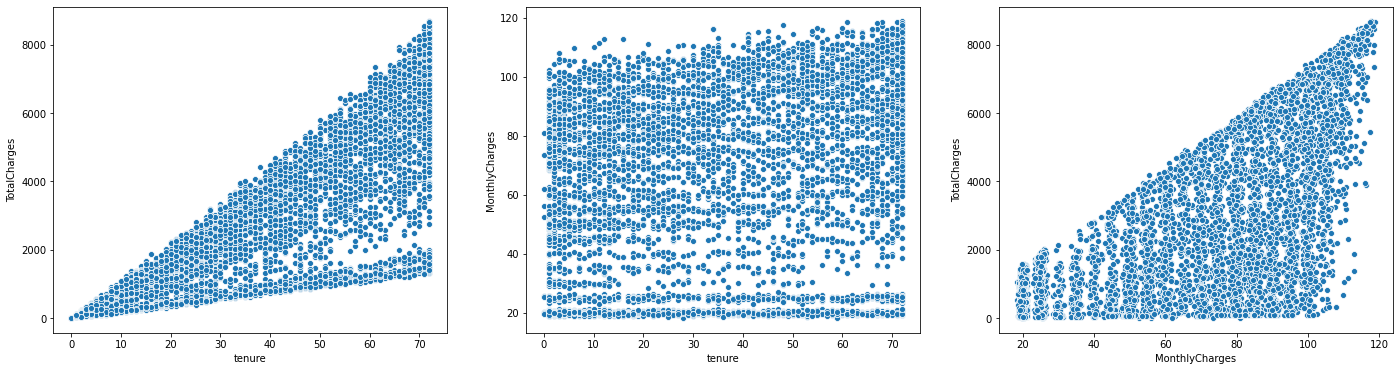

In [20]:
plt.figure(figsize=(24,6))

plt.subplot(131)
_ = sns.scatterplot(x='tenure', y='TotalCharges', data=customer_churn)
plt.subplot(132)
_ = sns.scatterplot(x='tenure', y='MonthlyCharges', data=customer_churn)
plt.subplot(133)
_ = sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=customer_churn)

- Korelsayon Matrisi Grafigi (heatmaps)

In [21]:
corr_matrix = customer_churn[continuous].corr()

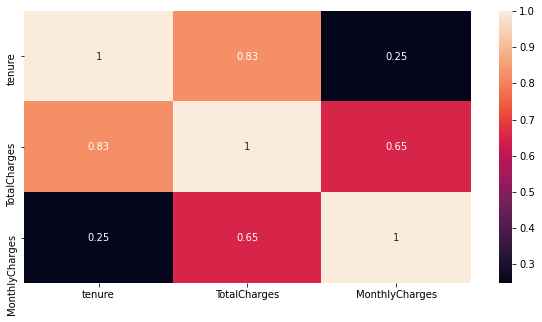

In [22]:
plt.figure(figsize=(10,5))
_ = sns.heatmap(corr_matrix, annot=True)

***Iki Kategorik Degiskenin Iki Degiskenli Analizi***
- Sayi Grafigi (count plots)
    - merkezde Churn olacak sekilde

In [23]:
customer_churn.sort_values('gender')

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
3947  4324-AHJKS  Female              0      No         No       5   
3946  5154-VEKBL  Female              0      No         No       9   
3945  3815-SLMEF  Female              0      No         No       3   
3944  4537-CIBHB  Female              0     Yes        Yes       9   
...          ...     ...            ...     ...        ...     ...   
4123  8910-LEDAG    Male              1     Yes         No      34   
1462  9824-QCJPK    Male              0     Yes         No      36   
4125  2716-GFZOR    Male              0     Yes         No      43   
4110  5208-FVQKB    Male              0     Yes         No      70   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
0              No  No phone service             DSL                   No   
3947          Yes                No             DSL                  Yes   
3946           No  No phone service             DSL                  Yes   
3945           No  No phone service             DSL                  Yes   
3944          Yes                No              No  No internet service   
...           ...               ...             ...                  ...   
4123          Yes                No     Fiber optic                   No   
1462          Yes                No              No  No internet service   
4125          Yes                No     Fiber optic                  Yes   
4110          Yes                No             DSL                  Yes   
7042          Yes                No     Fiber optic                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
0                     Yes                   No                   No   
3947                   No                  Yes                   No   
3946                   No                  Yes                  Yes   
3945                   No                   No                  Yes   
3944  No internet service  No internet service  No internet service   
...                   ...                  ...                  ...   
4123                   No                   No                   No   
1462  No internet service  No internet service  No internet service   
4125                  Yes                  Yes                   No   
4110                  Yes                   No                  Yes   
7042                   No                  Yes                  Yes   

              StreamingTV      StreamingMovies        Contract  \
0                      No                   No  Month-to-month   
3947                   No                   No  Month-to-month   
3946                  Yes                  Yes  Month-to-month   
3945                   No                   No  Month-to-month   
3944  No internet service  No internet service        One year   
...                   ...                  ...             ...   
4123                   No                   No  Month-to-month   
1462  No internet service  No internet service        One year   
4125                   No                   No  Month-to-month   
4110                   No                  Yes        Two year   
7042                  Yes                  Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check          29.850   
3947               No    Credit card (automatic)          55.800   
3946               No               Mailed check          58.500   
3945               No               Mailed check          34.250   
3944               No               Mailed check          20.250   
...               ...                        ...             ...   
4123               No    Credit card (automatic)          71.550   
1462               No               Mailed check          20.0

In [24]:
cat_wo_churn = [cat for cat in categoric if cat !='Churn']
f = pd.melt(customer_churn, id_vars='Churn', value_vars=cat_wo_churn)

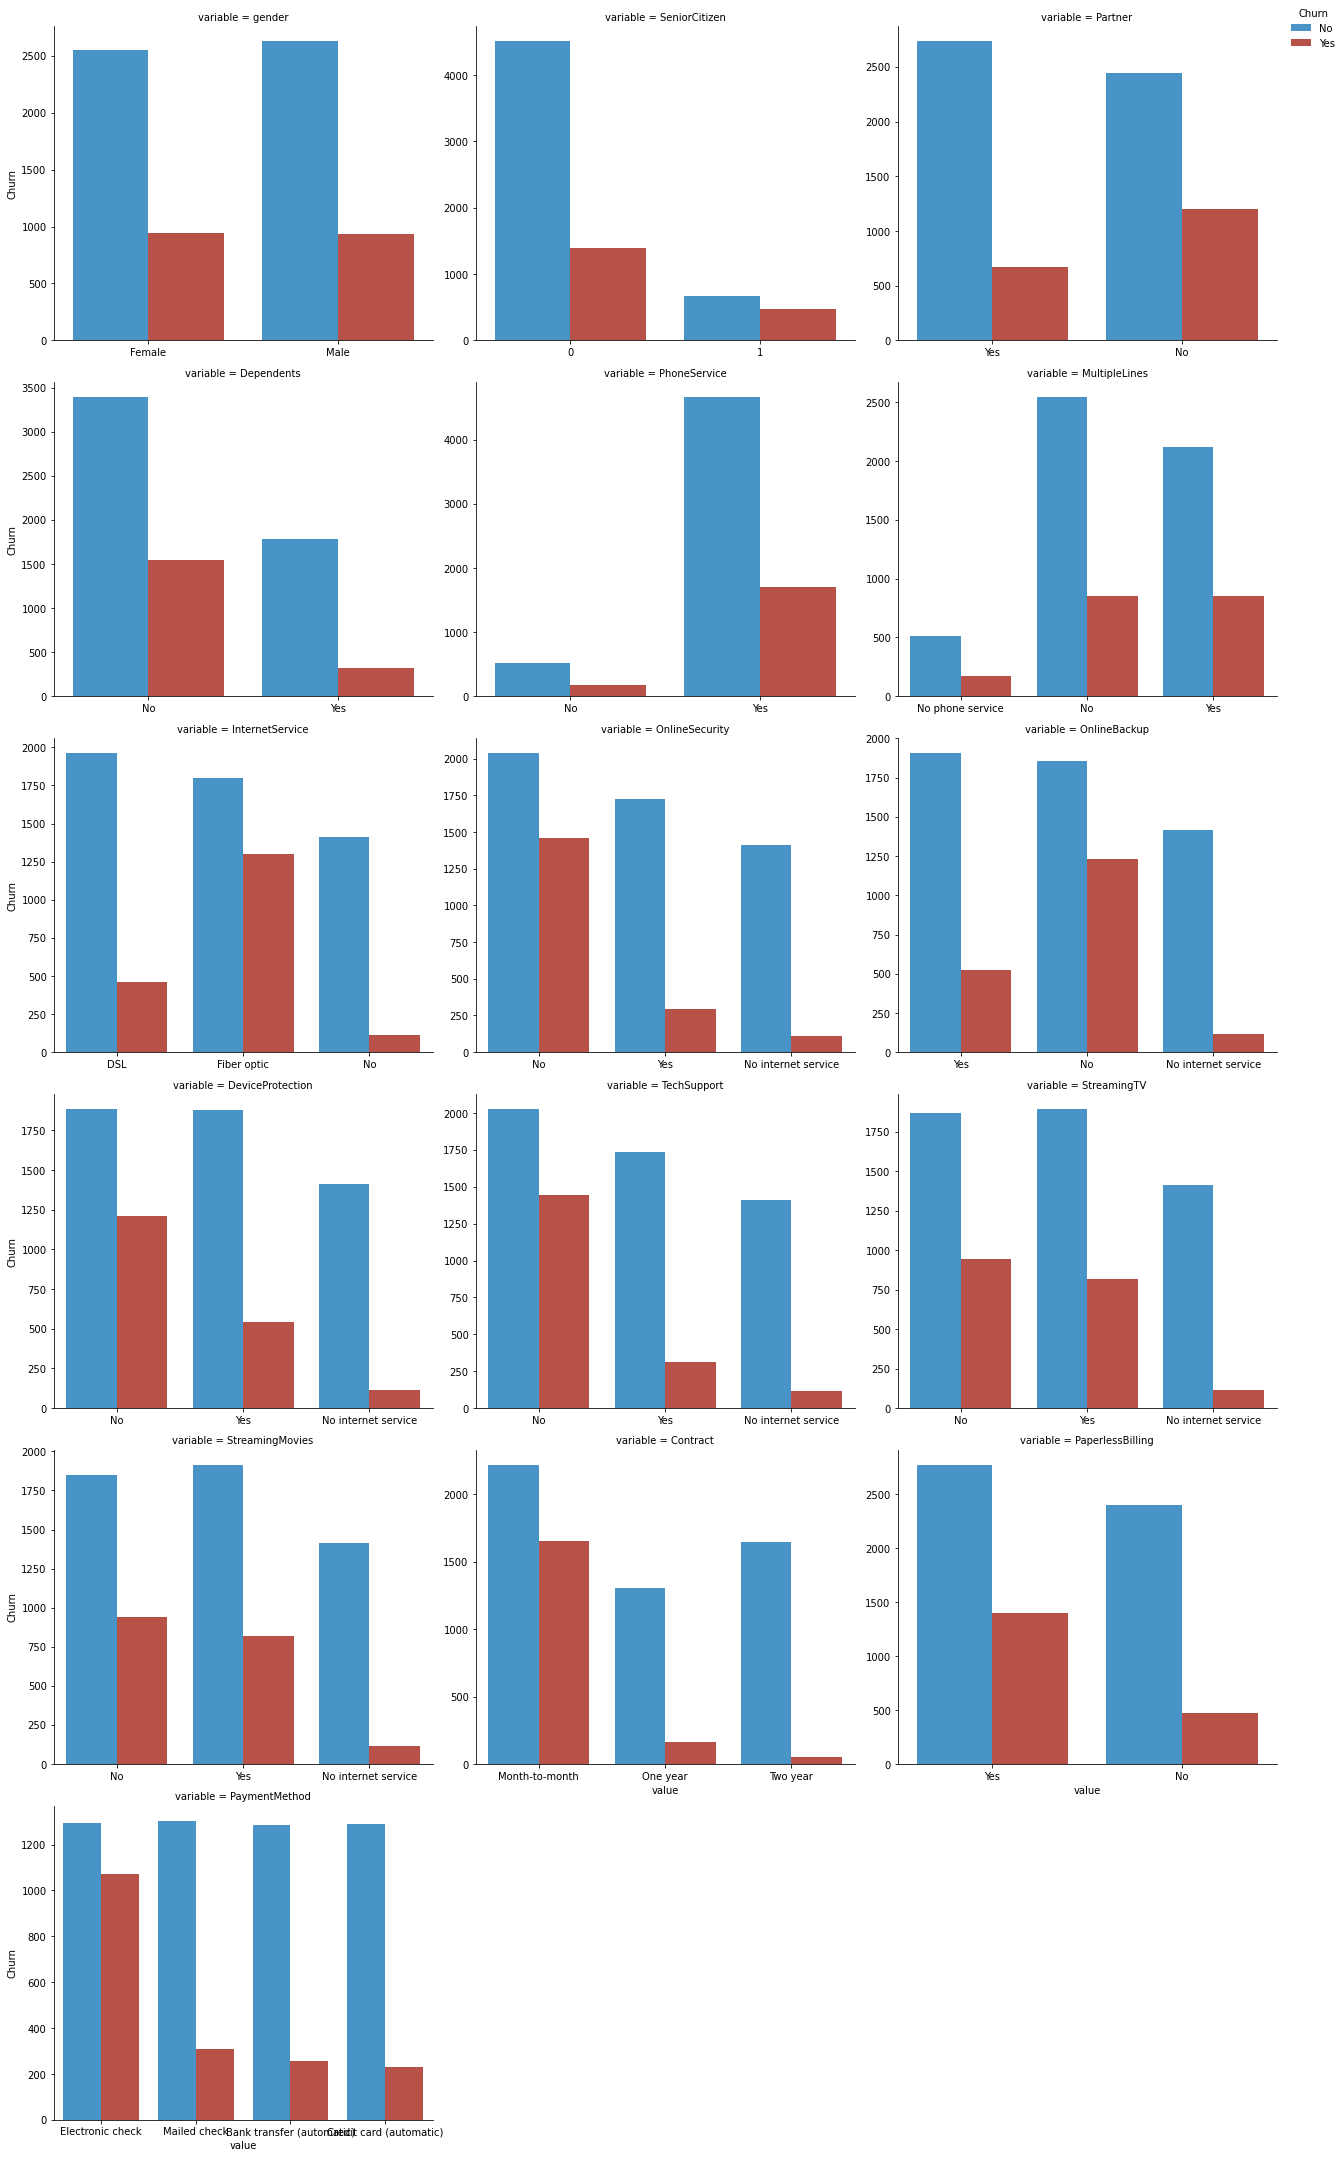

In [25]:
def countplot(value, hue, **kwargs):
    sns.countplot(x=value, hue=hue, palette=palette_binary)

g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height=5, aspect=1.2)
g = g.map(countplot, "value", "Churn")
g = g.add_legend(title='Churn', loc='top')

***Surekli ve Kategorik Degiskenin Iki Degiskenli Analizi***
- Cubuk Grafigi (bar, swarm, strip, box plots)
    - Degiskenler: surekli(tenure, MonthlyCharges, TotalCharges) kategorik(digerleri)

In [196]:
f = pd.melt(customer_churn, id_vars=continuous, value_vars=categoric)

- tenure merkezde olacak sekilde.

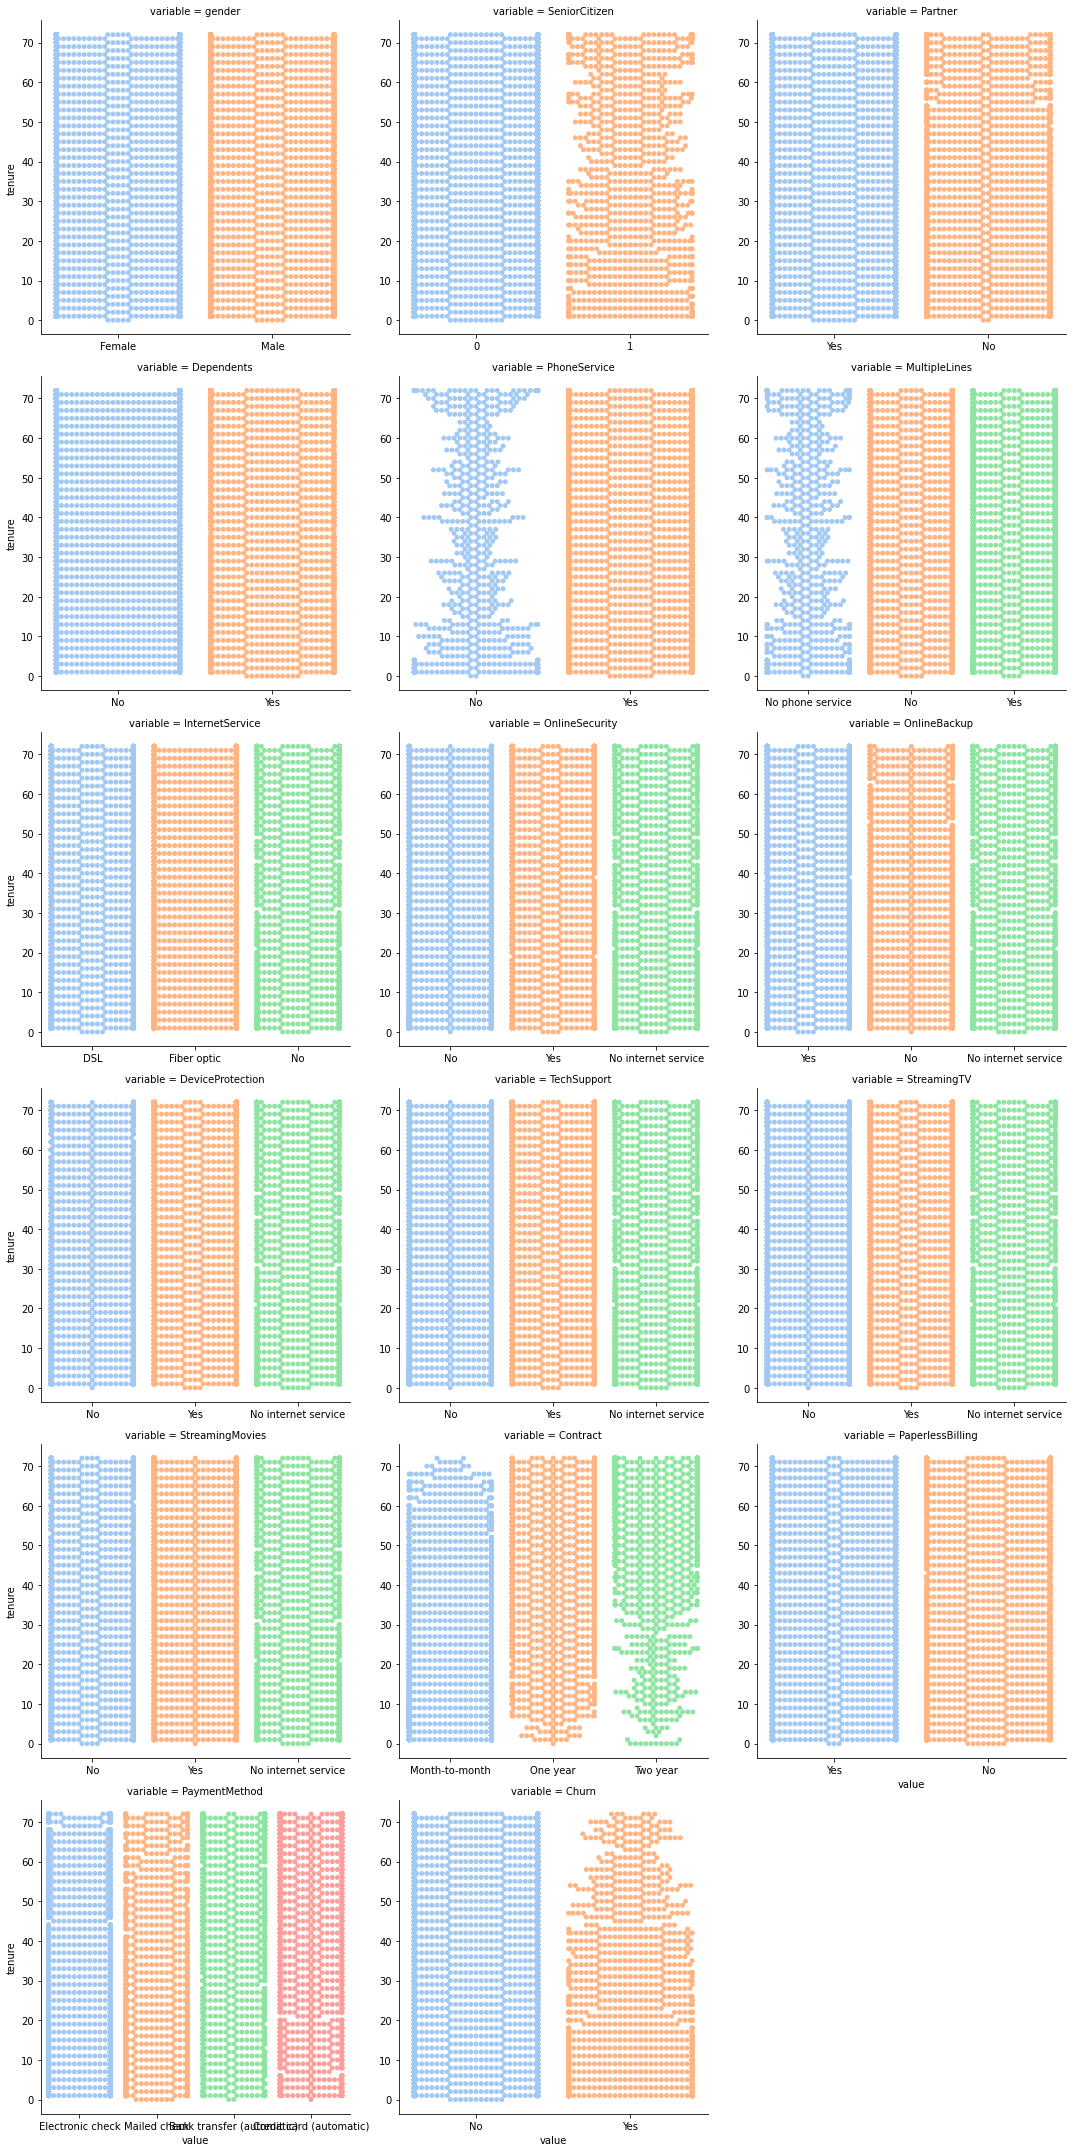

In [164]:
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(sns.swarmplot,'value', 'tenure', palette=sns.color_palette('pastel'))

- MonthlyCharges merkezde olacak sekilde.

In [168]:
continuous

['tenure', 'TotalCharges', 'MonthlyCharges']

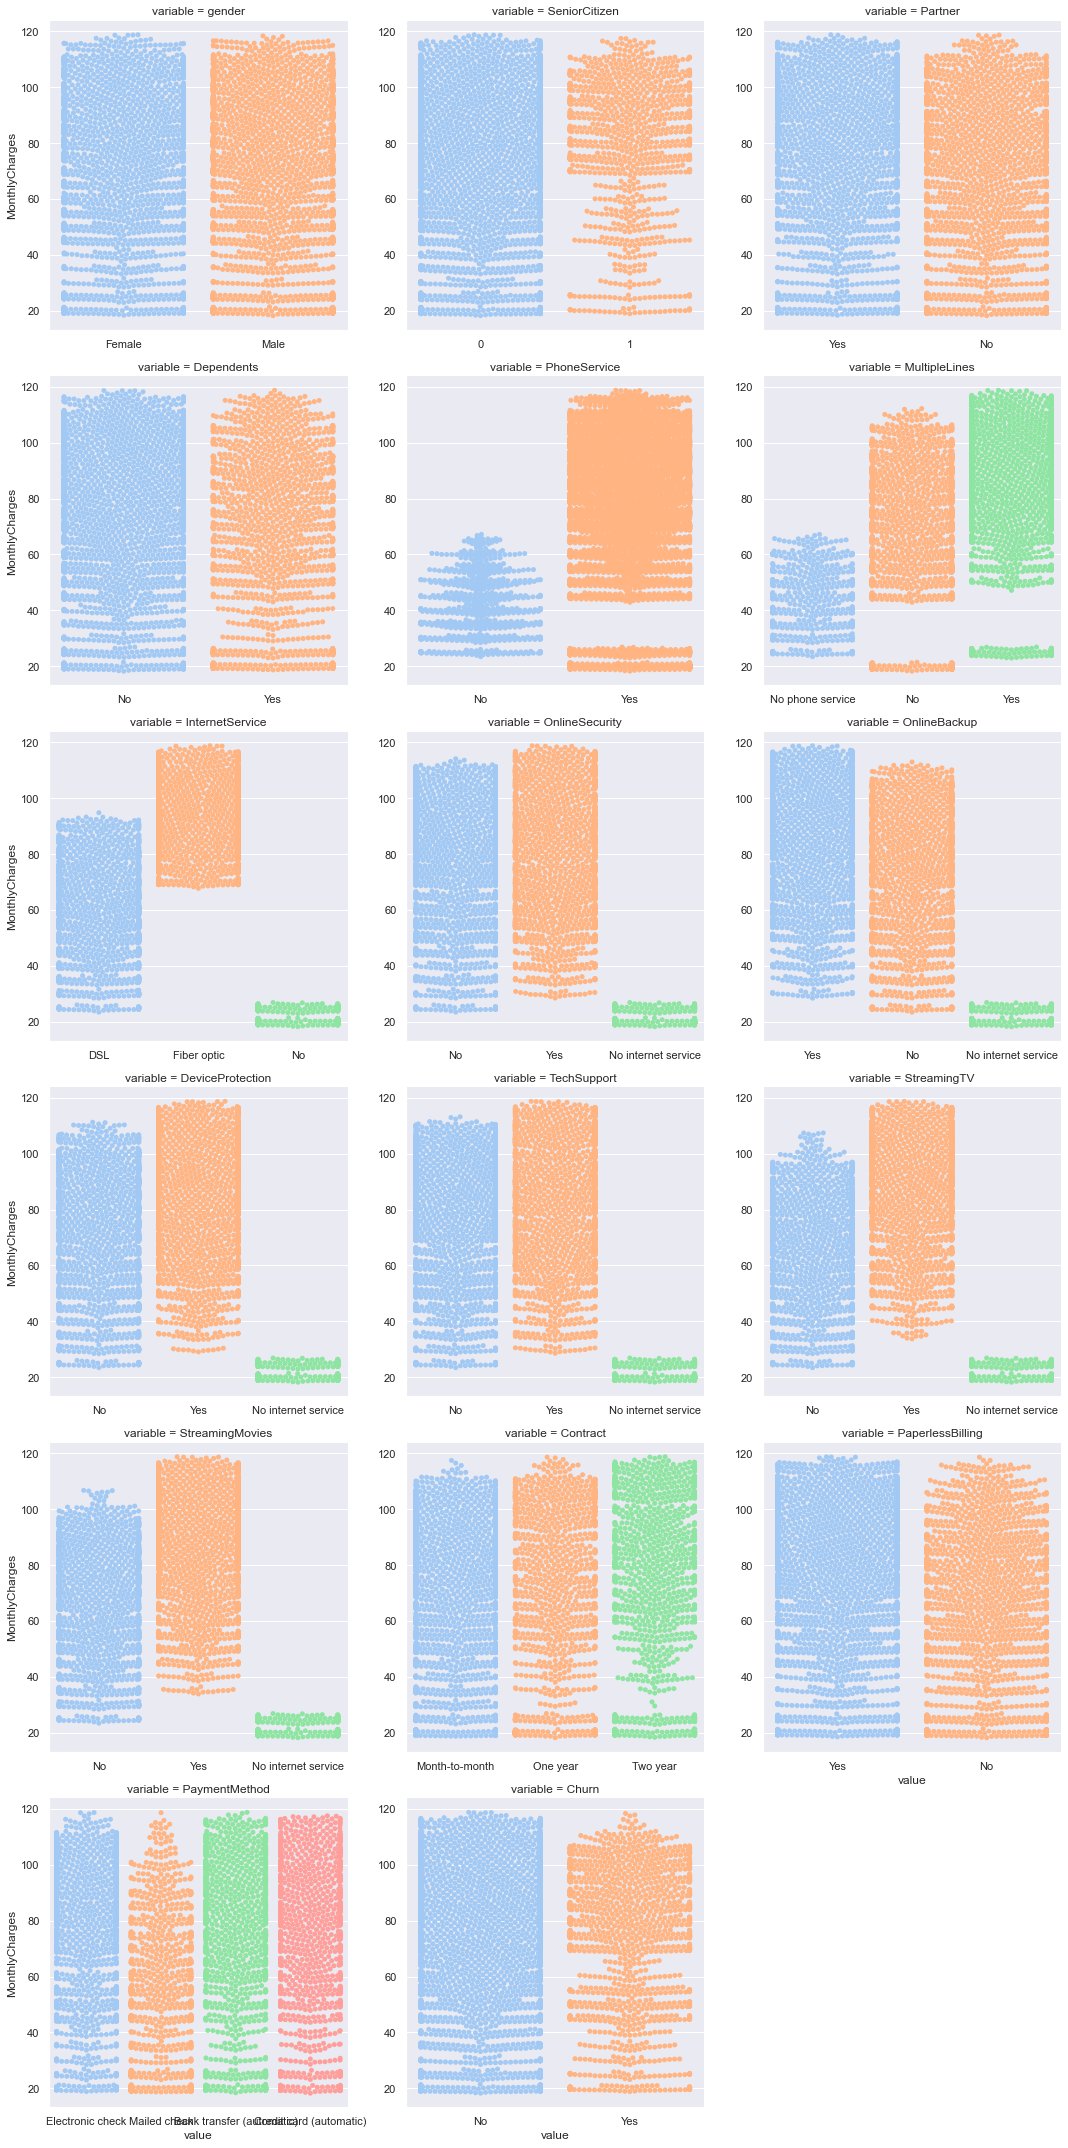

In [197]:
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(sns.swarmplot,'value', 'MonthlyCharges', palette=sns.color_palette('pastel'))

- TotalCharges merkezde olacak sekilde.

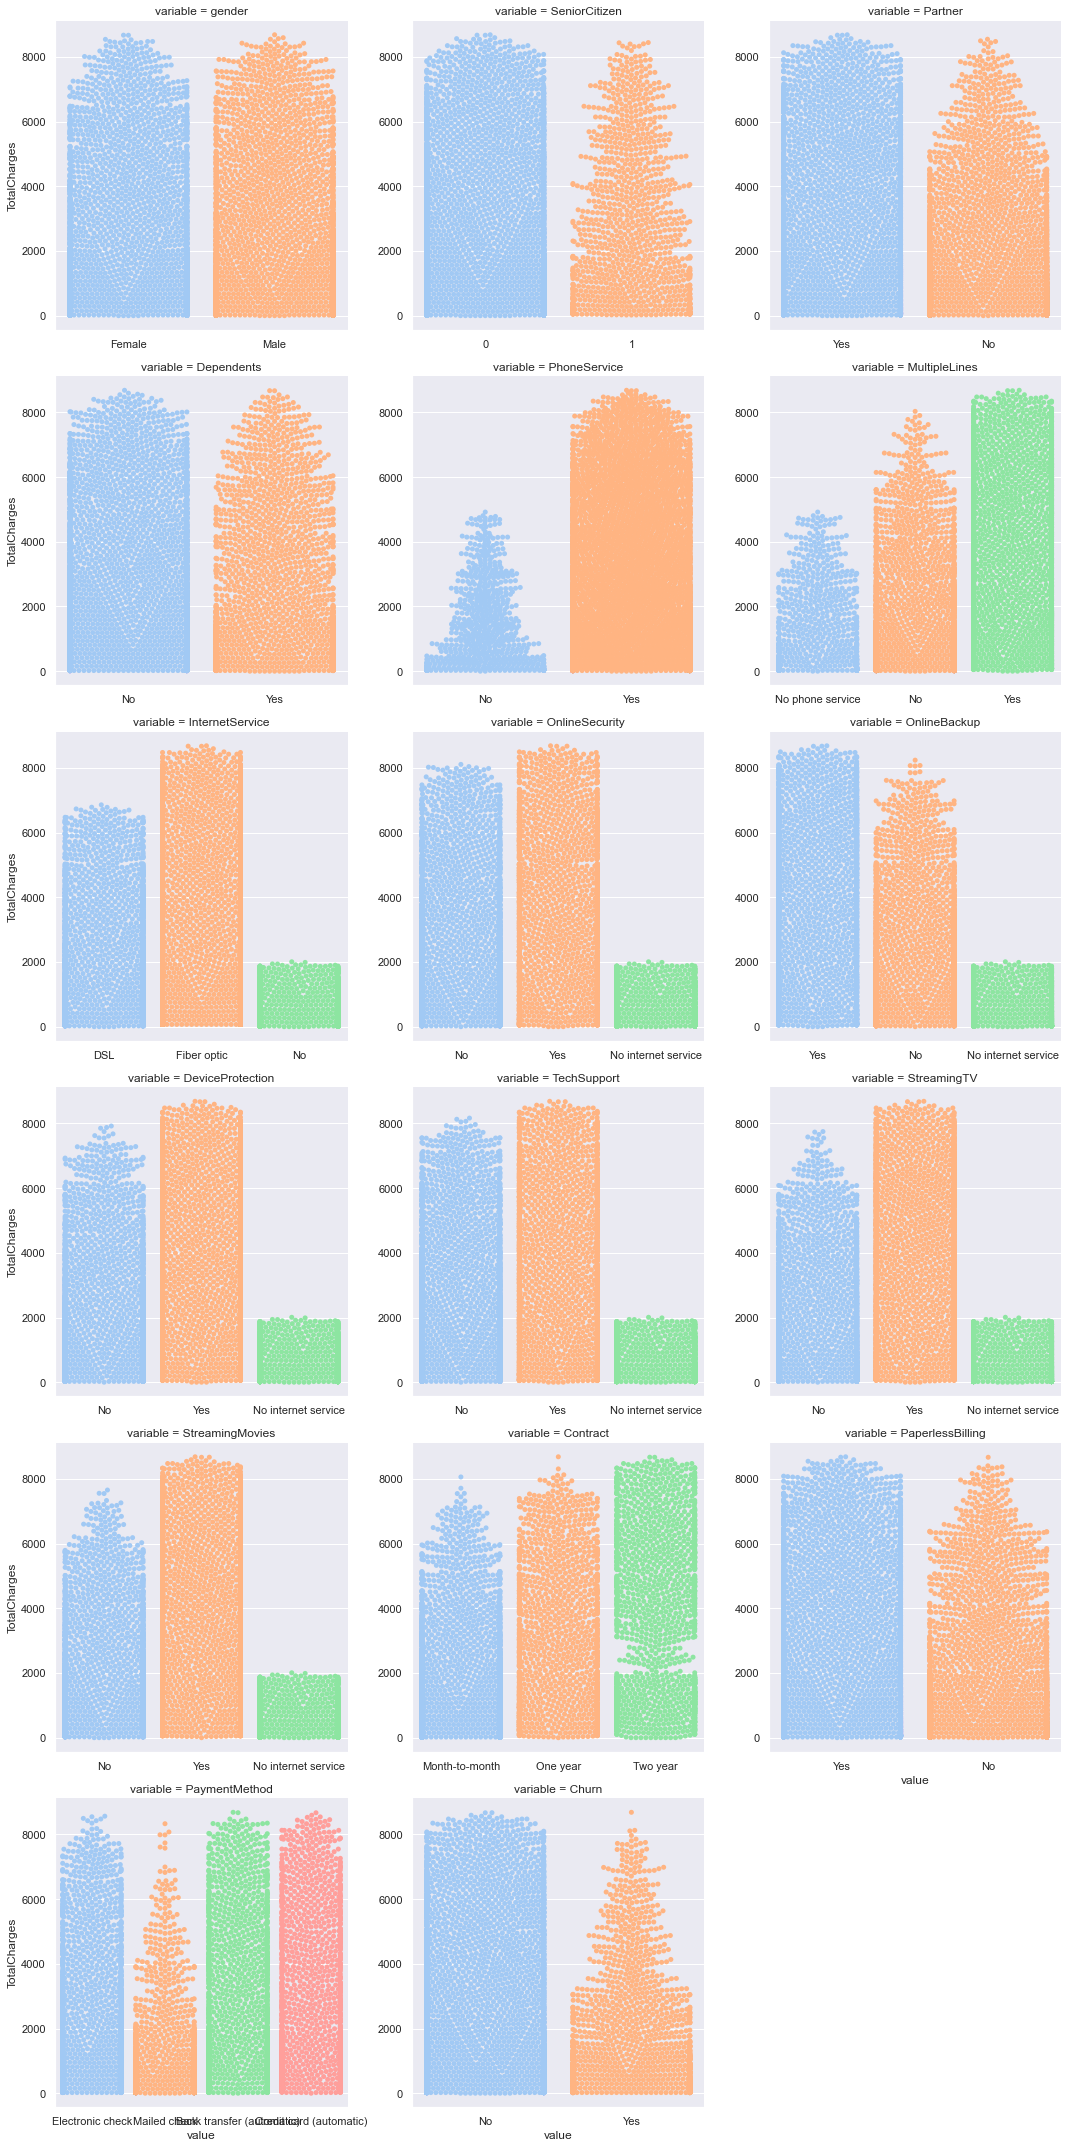

In [198]:
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(sns.swarmplot,'value', 'TotalCharges', palette=sns.color_palette('pastel'))

***Kategorik Hedef Degisken Merkezinde Surekli Degiskenlerin Analizi***

- scatterplot (hue, style, size eklenerek farkli kategorik degiskenler de eklenebilir)

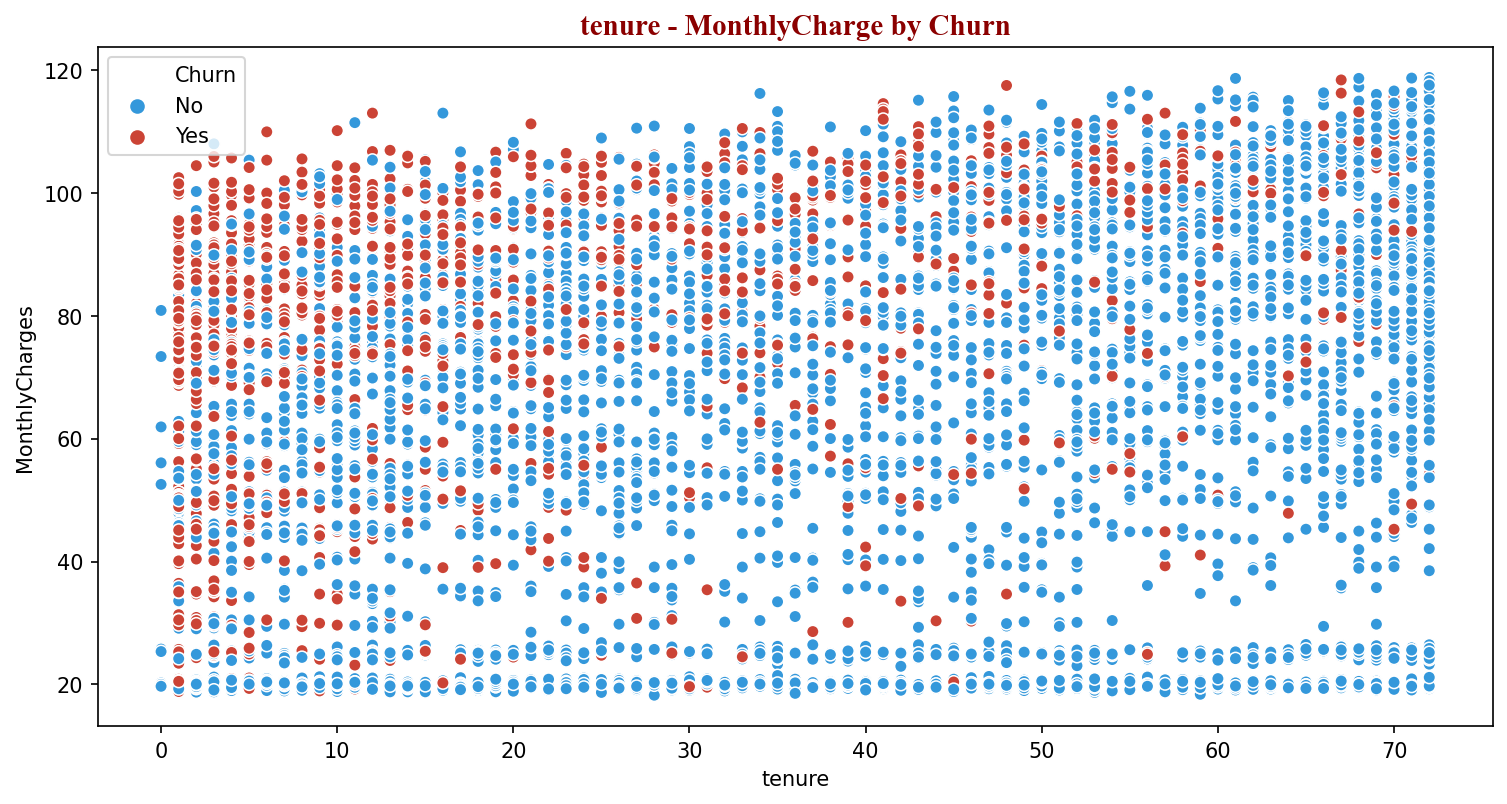

In [26]:
plt.figure(figsize=(12,6), dpi=150)
#plt.yticks(ticks=np.arange(0,530,20))
#plt.xticks(ticks=np.arange(0,81,2))
plt.title('tenure - MonthlyCharge by Churn', fontdict=font_title)
_ = sns.scatterplot(data=customer_churn, x='tenure', y='MonthlyCharges', 
                    hue='Churn', palette=palette_binary)

In [27]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
customer_churn.to_csv('data/telco_customer_churn_clean.csv',index=False)

### ***Degiskenleri Donusturme***
#### ***Metin Degiskenlerin Sayisal Degiskenlere Donusturulmesi***
- One Hot Encoding (get_dummies)

- Label encoding(replace, scikitlearn LabelEncoder)